In [4]:
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline

In [5]:
df = pd.read_csv('../dataset/cleaned.csv')

In [6]:
df_dummies = df.filter(['event_type', 'flight_condition','flight_operation', 'sightseeing', 'second_pilot'], axis=1)

In [7]:
df_dummies = pd.get_dummies(df_dummies, columns=['event_type', 'flight_condition', 'flight_operation', 'sightseeing',  'second_pilot'], drop_first=True)

In [8]:
df_dummies.head(1)

,event_type_INC,flight_condition_Unknown,flight_condition_VMC,flight_operation_ADRP,flight_operation_AOBV,flight_operation_ASHO,flight_operation_BANT,flight_operation_BUS,flight_operation_EXEC,flight_operation_EXLD,...,flight_operation_PERS,flight_operation_POSI,flight_operation_PUBF,flight_operation_PUBL,flight_operation_PUBS,flight_operation_PUBU,flight_operation_SKYD,flight_operation_UNK,sightseeing_True,second_pilot_True
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [9]:
# making death and injuries as either 1 or 0

for i in range(len(df['deaths_and_injuries'])):
    if df['deaths_and_injuries'][i] > 0:
        df['deaths_and_injuries'][i] = 1

<ipython-input-9-4febe336a289>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['deaths_and_injuries'][i] = 1


In [10]:
df['deaths_and_injuries']

0        0.0
1        0.0
2        1.0
3        1.0
4        0.0
        ... 
14317    0.0
14318    1.0
14319    1.0
14320    0.0
14321    1.0
Name: deaths_and_injuries, Length: 14322, dtype: float64

In [11]:
X = df_dummies
y = df['deaths_and_injuries']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
y.value_counts(normalize=True)  # Baseline

0.0    0.549784
1.0    0.450216
Name: deaths_and_injuries, dtype: float64

In [13]:
rf = RandomForestClassifier(random_state=42)
et = ExtraTreesClassifier(random_state=42)
cross_val_score(rf, X_train, y_train).mean(), cross_val_score(et, X_train, y_train).mean()

(0.5810435411039563, 0.5811366076465342)

In [14]:
rf_pipe = Pipeline([
    ('rf', RandomForestClassifier())
])

In [15]:
params = {
    'rf__random_state': [42],
    'rf__n_estimators': [180, 200, 220],
    'rf__max_depth': [23, 24, 25, 26]
}

In [16]:
gs = GridSearchCV(rf_pipe, param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.5812297608432487


{'rf__max_depth': 24, 'rf__n_estimators': 200, 'rf__random_state': 42}

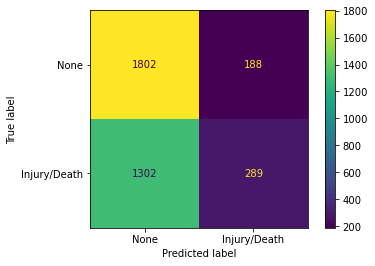

In [18]:
cm = metrics.plot_confusion_matrix(gs, X_test, y_test, display_labels=['None', 'Injury/Death'])
plt.savefig('../images/rf_cm.png', bbox_inches='tight')
plt.show(cm)